# Решающие деревья и решающие леса.

# 1. Решающие деревья

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевая переменная — расстояние от объекта до точки (0, 0).

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации

In [2]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Сгенерируем выборку

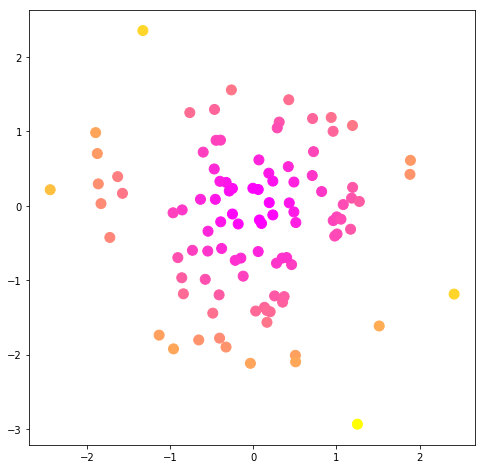

In [3]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [4]:
from sklearn.tree import DecisionTreeRegressor

Обучим дерево на сгенерированных данных и предскажем ответы для каждой точки решетки

[[-3.44070689 -3.93626898]
 [-3.43070689 -3.93626898]
 [-3.42070689 -3.93626898]
 ...
 [ 3.38929311  3.35373102]
 [ 3.39929311  3.35373102]
 [ 3.40929311  3.35373102]]


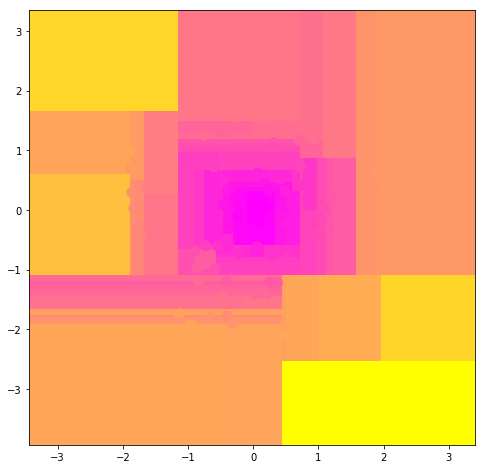

In [5]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)
print(np.c_[xx.ravel(), yy.ravel()])

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

# Задание

Сейчас мы сгенерировали 100 точек из нормального распределения и обучили решающее дерево на них. Сгенерируйте 300 точек из нормального распределения, обучите на них дерево и выведите на экран результат (как на картинке выше).

Сгенерированные точки и расстояние до точек сохраните в массивы data_x300, data_y300, для обучения и предсказания используйте эти массивы.

Улучшилось ли предсказание алгоритма на решётке? (т.е. стала ли раскраска всей плоскости более правильной?)

In [ ]:
#your code here

Вернёмся к исходным данным (100 точек).

Посмотрим как будут выглядеть разделяющая поверхность в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

In [ ]:
plt.figure(figsize=(18, 18))
for i, max_depth in enumerate([1, 2, 4, 6]):
    for j, min_samples_leaf in enumerate([1, 5, 10, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((4, 4), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

- Как влияет увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе на качество на обучающей выборке? на переобучение?

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


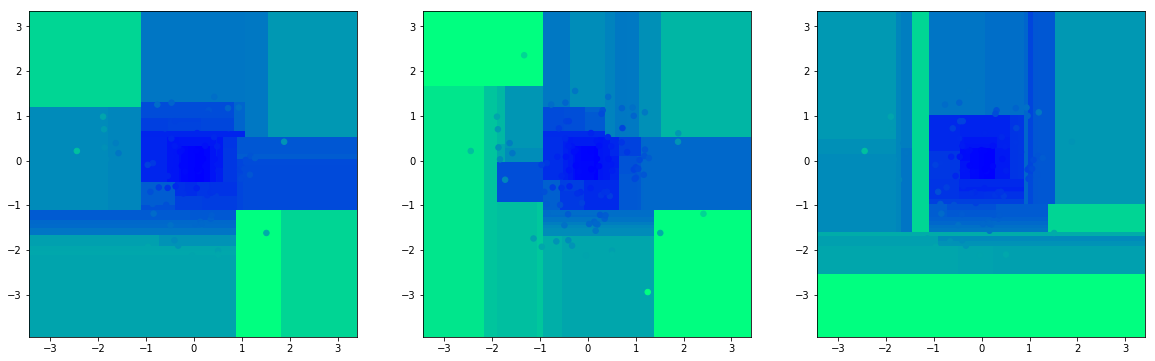

In [6]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indices = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indices], data_y[indices])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

In [7]:
from sklearn.datasets import load_boston

In [8]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
X_full = data.data
y_full = data.target

print(X_full[:3])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [10]:
X_full.shape

(506, 13)

In [11]:
y_full[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

- разобъём все данные на train и test
- будем оценивать качество алгоритма по кросс-валидации

In [12]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=241)

In [13]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(X.shape[0], shuffle=True, random_state=241)

In [14]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print(-cross_val_score(regr, X, y, cv=cv, 
                       scoring='neg_mean_squared_error').mean())

26.10864532019704


In [15]:
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=241, splitter='best')

# Задание

Метрика MSЕ имеет не ограничена сверху. Поэтому для оценки качества алгоритма можно также пользоваться метрикой R2 (коэффициент детерминации), так как он не превышает 1 (и чем ближе к 1, тем лучше).

Выведите на экран значение R2 алгоритма ('r2').

In [ ]:
#your code here

Для сравнения качества модели при различных наборах параметров или для сравнения моделей на одном датасете можно использовать, как и раньше, MSE.

Будем подбирать параметры решающего дерева по сетке с целью увеличить качество алгоритма. Будем подбирать значения max_features и max_depth.

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='neg_mean_squared_error')
gs.fit(X, y)

In [ ]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

# Задание

Теперь попробуем одновременно подбирать значения max_features, max_depth и min_samples_leaf. Ищите min_samples_leaf в диапазоне range(1,20).

In [ ]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeClassifier(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                              'min_samples_leaf': np.arange(1,20,1)},
                  cv=3,
                  scoring='accuracy')
gs.fit(X, y)

In [ ]:
gs.best_score_

Как в данной задаче зависит качество алгоритма от количества параметров, которые мы оптимизируем?

# Решающие деревья для классификации

Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

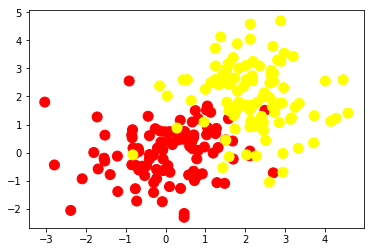

In [16]:
n = 100
a = np.random.normal(loc=0, size=(n, 2))
b = np.random.normal(loc=2, size=(n, 2))

data_x = np.vstack([a, b])
data_y = np.hstack([np.zeros(n), np.ones(n)])

scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='autumn')

Попробуем разделить эти два класса, обучив решающее дерево. Визуализируем полученную границу разделения класссов.

(-4.0328867400509765, 5.577113259948819)

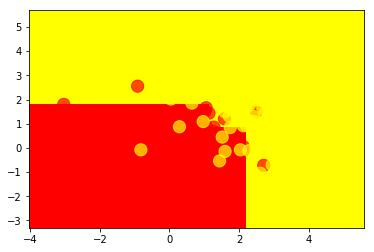

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)
clf.fit(data_x, data_y)
xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pcolormesh(xx, yy, predicted, cmap='autumn')
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=150, cmap='autumn', alpha=0.7)
ylim([yy.min(),yy.max()])
xlim([xx.min(),xx.max()])

# Задание
По аналогии с GridSearchCV для DecisionTreeRegressor используйте GridSearchCV для DecisionTreeClassifier, чтобы посмотреть, как различные параметры влияют на качество классификации.

возьмите cv=5 (число фолдов), параметры 'min_samples_leaf': [1, 3, 7, 20], 'max_depth': [2, 3, 5, 10]

In [19]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeClassifier(random_state=241),
                  param_grid={'max_depth': [2,3,5,10],
                              'min_samples_leaf': [1,3,7,20]},
                  cv=5,
                  scoring='accuracy')
gs.fit(data_x, data_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 5, 10], 'min_samples_leaf': [1, 3, 7, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
print(gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 7}


(-4.0328867400509765, 5.577113259948819)

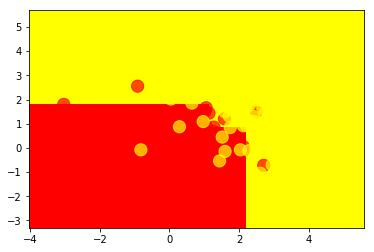

In [21]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)
clf.fit(data_x, data_y)
xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pcolormesh(xx, yy, predicted, cmap='autumn')
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=150, cmap='autumn', alpha=0.7)
ylim([yy.min(),yy.max()])
xlim([xx.min(),xx.max()])

## 2. Решающий лес

Посмотрим, какое качество можно получить при использовании решающего леса. Будем делать предсказания на Boston dataset.

In [33]:
regr = DecisionTreeRegressor()
t1 = time.time()
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())
t2 = time.time()
print('time:', t2-t1)

Wall time: 0 ns
23.680862068965517
time: 1.0362231731414795


Выведите среднюю квадратичную ошибку на кросс-валидации для решающего леса с количеством деревьев n_estimators: 10, 100, 300, 500, 1000.

In [32]:
from sklearn.ensemble import RandomForestRegressor
import time

regr = RandomForestRegressor(n_estimators=10)

t1 = time.time()
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())
t2 = time.time()
print('time:', t2-t1)

12.869498768472909
time: 6.663200378417969


In [34]:
regr = RandomForestRegressor(n_estimators=100)

t1 = time.time()
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())
t2 = time.time()
print('time:', t2-t1)

11.467040955665016
time: 68.83440518379211


Напечатайте время работы каждого из алгоритмов: 1) решающего дерева 2) решающего леса из предыдущей ячейки

In [ ]:
#your code here

# Задание
Постройте график качества классификации на кросс-валидации в зависимости от числа деревьев.

На каждой итерации цикла обучайте регрессор командой regr = ... и добавляйте в список Scores число cross_val_score:
Scores.append(cross_val_score(...))

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:47<00:00, 45.70s/it]


([<matplotlib.axis.XTick at 0x21a93065278>,
 <a list of 6 Text xticklabel objects>)

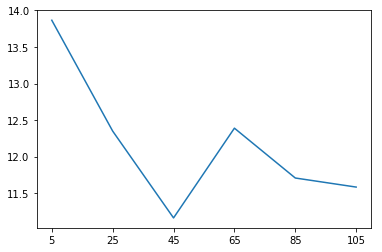

In [35]:
from tqdm import tqdm

Ntrees = np.arange(5,120,20)
Scores = []

for elem in tqdm(Ntrees):
    #Your code here
    regr = RandomForestRegressor(n_estimators=elem)
    Scores.append(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())
    
plot(Scores)
xticks(arange(len(Ntrees)), Ntrees)

Постройте график количества времени, потраченного на обучение в зависимости от числа деревьев.

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:45<00:00, 45.21s/it]


([<matplotlib.axis.XTick at 0x21a92d9c278>,
 <a list of 6 Text xticklabel objects>)

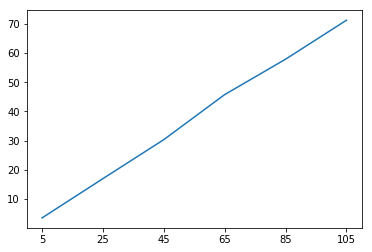

In [36]:
from tqdm import tqdm

Ntrees = np.arange(5,120,20)
Times = []

for elem in tqdm(Ntrees):
    regr = RandomForestRegressor(n_estimators=elem)
    t1 = time.time()
    s = -cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean()
    t2 = time.time()
    Times.append(t2-t1)
    
plot(Times)
xticks(arange(len(Ntrees)), Ntrees)

# Задание
Поработайте с датасетом для классификации https://archive.ics.uci.edu/ml/datasets/Alcohol+QCM+Sensor+Dataset#

0) Загрузите все таблички из датасета (QCM.csv) и объедините их в одну таблицу. 

Последние 5 колонок содержат в себе целевую переменную. Создайте одну колонку с целевой переменной y следующим образом: если 1-Octanol = 1, то y = 0, если 1-Propanol = 1, то y=1, если 2-Butanol = 1, то y=2 и т.д.

Создайте матрицу объект-признак X, содержащую все признаки (кроме последних 5 целевых колонок). 

1) Посчитайте качество DecisionTreeClassifier и RandomForestClassifier на кросс-валидации.

2*) Попробуйте уменьшить число признаков с помощью какого-либо метода отбора признаков (http://scikit-learn.org/stable/modules/feature_selection.html). Добейтесь увеличения качества RandomForestClassifier на кросс-валидации.

In [39]:
import pandas as pd

data1 = pd.read_csv("QCM3.csv",delimiter=';')
data2 = pd.read_csv("QCM6.csv",delimiter=';')
data3 = pd.read_csv("QCM7.csv",delimiter=';')
data4 = pd.read_csv("QCM10.csv",delimiter=';')
data5 = pd.read_csv("QCM12.csv",delimiter=';')

#your code here
df = pd.concat([data1, data2, data3, data4, data5])
df.tail()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
20,-54.35,-56.09,-88.23,-90.54,-128.65,-132.19,-173.71,-179.36,-231.30,-239.19,0,0,0,0,1
21,-56.14,-57.35,-90.74,-92.60,-132.16,-135.36,-178.79,-183.93,-239.06,-246.53,0,0,0,0,1
22,-57.71,-58.37,-92.83,-93.91,-134.83,-137.56,-182.33,-187.16,-243.12,-250.30,0,0,0,0,1
23,-58.36,-58.92,-94.31,-95.13,-136.44,-138.96,-184.70,-189.32,-246.15,-252.80,0,0,0,0,1
24,-59.00,-59.26,-94.97,-95.51,-137.28,-139.36,-186.98,-191.19,-248.98,-255.23,0,0,0,0,1


In [44]:
def get_target(x):
    if x['1-Octanol'] == 1:
        return 0
    if x['1-Propanol'] == 1:
        return 1
    if x['2-Butanol'] == 1:
        return 2
    if x['2-propanol'] == 1:
        return 3
    if x['1-isobutanol'] == 1:
        return 4
    return -1
    
df['Target'] = df.apply(get_target, axis=1)

df.drop(['1-Octanol','1-Propanol','2-Butanol','2-propanol','1-isobutanol'],\
        axis=1, inplace=True)

In [45]:
df.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Target
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,0


In [48]:
X = df.drop('Target',axis=1)
y = df['Target']

In [50]:
dt = DecisionTreeClassifier()

print(cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean())

0.472


In [57]:
from sklearn.ensemble import RandomForestClassifier

for n in range(11, 21):
    rf = RandomForestClassifier(n_estimators = n, max_depth=4)
    
    print('n = ',n)
    print(cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean())

n =  11
0.33599999999999997
n =  12
0.32
n =  13
0.344
n =  14
0.4
n =  15
0.384
n =  16
0.34400000000000003
n =  17
0.352
n =  18
0.352
n =  19
0.304
n =  20
0.392


# Задание
Примените к BostonDataset линейную регрессию. Сравните ее качество на кросс-валидации с качеством DecisionTreeRegressor и RandomForestRegressor.
Какой алгоритм работает лучше?

In [ ]:
regr = #your algroithm here
cv = KFold(data_x.shape[0], shuffle=True, random_state=241)

print(cross_val_score(regr, data_x, data_y, cv=cv, scoring='neg_mean_squared_error').mean())

#Try other algorithms